<a href="https://colab.research.google.com/github/SanjeevRK21/Project-Stock_Risk_Analysis/blob/main/Stock_Risk_Analysis_D3V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Day 3**

In [5]:
# Here we are mounting our drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Here we will extract the log_daily_returns.csv values
import pandas as pd
project_path = '/content/drive/My Drive/Project_1'
daily_log_path = f'{project_path}/daily_log_returns2.csv'
returns = pd.read_csv(daily_log_path,index_col = 0, parse_dates= True)
returns

,log_returns
date,
2020-01-03,-0.009770
2020-01-06,0.007937
2020-01-07,-0.004714
2020-01-08,0.015958
2020-01-09,0.021019
...,...
2023-12-22,-0.005563
2023-12-26,-0.002845
2023-12-27,0.000518


In [7]:
# Now lets convert the returns DataFrame to a series and then extract contents from 2020 to 2021. We are converting it into a series to set the datas into 1D.
# Here dates act as indeces for the log_returns so making it as a series is enough
returns_series = returns.squeeze()
#returns_series
returns_2020 = returns_series.loc['2020-01-01':'2021-01-01']
returns_2020

,log_returns
date,
2020-01-03,-0.009770
2020-01-06,0.007937
2020-01-07,-0.004714
2020-01-08,0.015958
2020-01-09,0.021019
...,...
2020-12-24,0.007683
2020-12-28,0.035141
2020-12-29,-0.013404


In [52]:
# Okay now lets see a comparision where if i had invested Rs 1 at the start of my 2020 how much would it change throughout the year
import numpy as np
import matplotlib.pyplot as plt

cummulative_returns_2020 = np.exp(returns_2020.cumsum());
'''
Okay the maths here is e^ returns_2020 value will automaticaly give us the how the investment of 1 would change. it basically adds up the log values till that index.
Like for index 3 it will be e^(log value (index 1) + log value (index 2) + log value(index 3))
for example
Day	log_returns
1 	0.05
2	  -0.02
3	  0.03

here when you put exp(log_return.cumsum()), it will be
Day	log_returns
1 	e^(0.05)
2	  e^(0.05 - 0.02)
3	  e^(0.05 - 0.02 +0.03)

final result will be
Day	value of 1 invested
1 	1.0513
2	  1.0305
3	  1.0618
'''
#cummulative_returns_2020
print('if you had invested Rs 1 in APPL in 2020 but the year end it would be')
cummulative_returns_2020.iloc[-1] # iloc basically gives the exact value in a perticular position indentified by row and coloumn number .iloc[row number, column number]
#cummulative_returns_2020.plot()


if you had invested Rs 1 in APPL in 2020 but the year end it would be


np.float64(1.7823998814136146)

/tmp/ipython-input-4142186000.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prices = pd.read_csv(f'{project_path}/raw_prices.csv', index_col = 0, parse_dates = True)


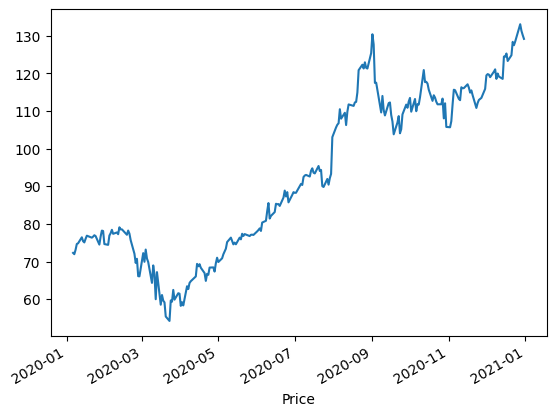

In [51]:
#Here lets just check the stock prices of APPL during 2020 to 2021 once
prices = pd.read_csv(f'{project_path}/raw_prices.csv', index_col = 0, parse_dates = True)
prices_series = prices.squeeze()
#prices_series.index #By this we realised proper indexes of dates starts from 4
prices_series = prices_series.iloc[4:]
prices_series.index = pd.to_datetime(prices_series.index, errors="coerce")
prices_series = pd.to_numeric(prices_series, errors="coerce")
prices_seriess = prices_series.loc['2020-01-01':'2021-01-01']
#prices_seriess
prices_seriess.plot()
plt.show()

<Axes: xlabel='date'>

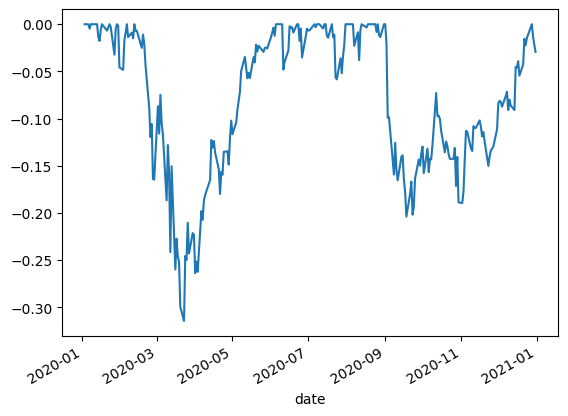

In [59]:
# Now lets calculate Drawdown series, it basicaly tells what was the difference in the current stock price from its maximum value during a perticular period
cummulative_max_2020 = cummulative_returns_2020.cummax()
drawdown_2020 = (cummulative_returns_2020 - cummulative_max_2020) / cummulative_max_2020
#drawdown_2020
drawdown_2020.plot() # here 0 shows the net zero loss occured,
#drawdown_2020.min() # this shows the maximum loss you could have incured if you had invested during this time in APPL.